# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-07-26 19:00:22.047810


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 7/25/20


,7/25/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,4178409,146463,3.51
Brazil,2394513,86449,3.61
United Kingdom,300270,45823,15.26
Mexico,385036,42645,11.08
Italy,245864,35102,14.28
India,1385635,32060,2.31
France,217801,30195,13.86


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 7/25/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
32175,US,4038816,2020-07-23,144430.0,1114.0,68695.0,66094.142857
32174,US,3970121,2020-07-22,143316.0,1195.0,70910.0,67317.000000
32173,US,3899211,2020-07-21,142121.0,1096.0,64534.0,66805.285714
32172,US,3834677,2020-07-20,141025.0,491.0,61417.0,67217.142857
32171,US,3773260,2020-07-19,140534.0,415.0,61847.0,66902.571429
32170,US,3711413,2020-07-18,140119.0,853.0,63698.0,66498.285714
32169,US,3647715,2020-07-17,139266.0,908.0,71558.0,65996.857143


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 7/25/20


,7/25/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,411200,32608.0,7.93
New Jersey,178858,15776.0,8.82
Massachusetts,115268,8510.0,7.38
California,446452,8408.0,1.88
Illinois,171122,7589.0,4.43
Pennsylvania,111115,7124.0,6.41
Michigan,85622,6400.0,7.47


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 7/25/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1113,California,430773,2020-07-23,8201.0,154.0,9487.0,9438.142857
1112,California,421286,2020-07-22,8047.0,159.0,11981.0,9485.857143
1111,California,409305,2020-07-21,7888.0,118.0,11435.0,9013.428571
1110,California,397870,2020-07-20,7770.0,55.0,10964.0,9216.142857
1109,California,386906,2020-07-19,7715.0,13.0,6161.0,8909.000000
1108,California,380745,2020-07-18,7702.0,99.0,7486.0,8854.857143
1107,California,373259,2020-07-17,7603.0,114.0,8553.0,8910.571429


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' COVID-19 cases by county as of', mostrecentdatecases)
casessummary



Number of confirmed California COVID-19 cases by county as of 7/25/20


,7/25/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,172325,4351.0,2.52
Riverside,33467,637.0,1.90
Orange,33953,562.0,1.66
San Diego,26098,524.0,2.01
San Bernardino,26796,372.0,1.39
Santa Clara,8833,184.0,2.08
Imperial,9067,181.0,2.00


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 7/25/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
3531,Los Angeles,166868,2020-07-23,4263.0,48.0,1734.0,2741.428571
3530,Los Angeles,165134,2020-07-22,4215.0,60.0,3109.0,3132.428571
3529,Los Angeles,162025,2020-07-21,4155.0,51.0,2980.0,3064.142857
3528,Los Angeles,159045,2020-07-20,4104.0,8.0,3128.0,3241.142857
3527,Los Angeles,155917,2020-07-19,4096.0,12.0,2765.0,3195.428571
3526,Los Angeles,153152,2020-07-18,4084.0,36.0,2728.0,3251.142857
3525,Los Angeles,150424,2020-07-17,4048.0,59.0,2746.0,3283.571429
3524,Los Angeles,147678,2020-07-16,3989.0,46.0,4471.0,3240.857143
3523,Los Angeles,143207,2020-07-15,3943.0,46.0,2631.0,2850.142857
3522,Los Angeles,140576,2020-07-14,3897.0,73.0,4219.0,2830.285714



7 day new US cases as of 7/25/20


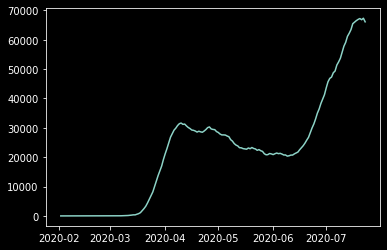

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 7/25/20


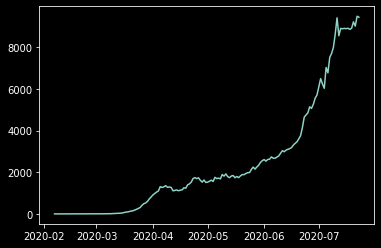

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 7/25/20


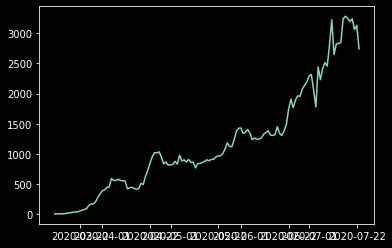

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.plot(countyDataTA["Rolling7Average"])

plt.show()